<a href="https://colab.research.google.com/github/RahmaAli-Cybersecurity/Phishing-Detection-/blob/main/Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Loading and Exploration


In [ ]:
# Importaing Pandas and NumPy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [ ]:
# Loading the data
# Installing gdown to download the dataset from google drive
!pip install gdown
import gdown
# Downloading the URL dataset
url='https://drive.google.com/file/d/1HRwBH2iXTlWHST4pGZp-I3zW1Xl6gbUr/view'
file_id=url.split('/')[5] # Changed split index to 5 to get the file ID
gdown.download(id=file_id, output='WebsitePhishing.csv', quiet=False)

# Loading the dataset into a pandas DataFrame
data = pd.read_csv ('WebsitePhishing.csv', delimiter=',')


Downloading...
From: https://drive.google.com/uc?id=1HRwBH2iXTlWHST4pGZp-I3zW1Xl6gbUr
To: /content/WebsitePhishing.csv
100%|██████████| 25.5M/25.5M [00:00<00:00, 69.9MB/s]


In [ ]:
# Preview last first rows
data.head()

,type,length,num_digits,num_special,has_mixed_case,num_slashes,has_https,query_params,domain_parts,has_ip,domain_extension,subdomain_count,url_entropy
0,0,22,0,5,False,2,True,0,1,False,com,1,3.663533
1,0,23,0,5,False,2,True,0,1,False,com,1,3.762267
2,0,24,0,5,False,2,True,0,1,False,com,1,3.855389
3,0,21,0,5,False,2,True,0,1,False,com,1,3.880180
4,0,25,0,5,False,2,True,0,1,False,org,1,3.813661


In [ ]:
# Preview last few rows
data.tail()

,type,length,num_digits,num_special,has_mixed_case,num_slashes,has_https,query_params,domain_parts,has_ip,domain_extension,subdomain_count,url_entropy
450171,1,43,0,9,False,5,False,0,1,False,com,0,3.874426
450172,1,159,21,20,True,14,False,0,1,False,com,0,4.895229
450173,1,147,20,18,True,14,False,0,1,False,com,0,4.831358
450174,1,22,0,5,False,3,False,0,1,False,com,0,3.720129
450175,1,143,9,16,True,9,False,0,1,False,com,0,5.352063


In [ ]:
# Short summary of columns,data types and more..
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450176 entries, 0 to 450175
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   type              450176 non-null  int64  
 1   length            450176 non-null  int64  
 2   num_digits        450176 non-null  int64  
 3   num_special       450176 non-null  int64  
 4   has_mixed_case    450176 non-null  bool   
 5   num_slashes       450176 non-null  int64  
 6   has_https         450176 non-null  bool   
 7   query_params      450176 non-null  int64  
 8   domain_parts      450176 non-null  int64  
 9   has_ip            450176 non-null  bool   
 10  domain_extension  445854 non-null  object 
 11  subdomain_count   450176 non-null  int64  
 12  url_entropy       450176 non-null  float64
dtypes: bool(3), float64(1), int64(8), object(1)
memory usage: 35.6+ MB


In [ ]:
# Check class distribution in the target column
data['type'].value_counts()


,count
type,
0,345738
1,104438


In [ ]:
# Display the shape of the dataset
data.shape

(450176, 13)

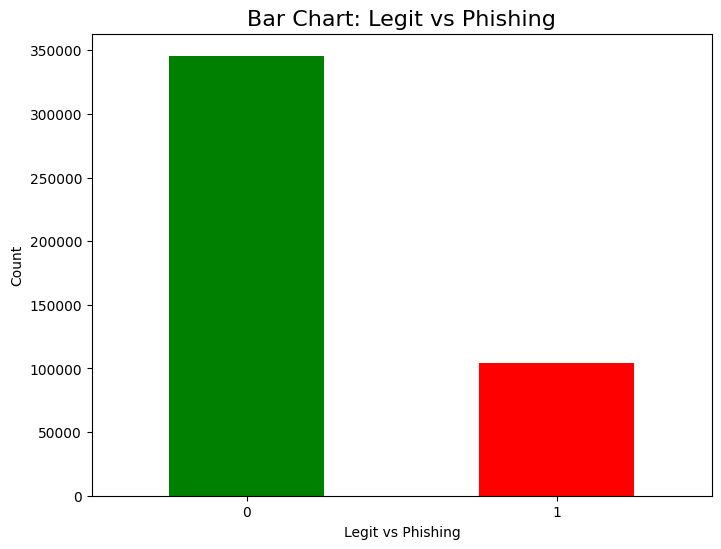

In [ ]:
# Bar chart for the same target distribution
# Calculate counts for each category
count_data = data['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
count_data.plot(kind='bar', color=['green', 'red'])
plt.title('Bar Chart: Legit vs Phishing', fontsize=16)
plt.xlabel('Legit vs Phishing')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

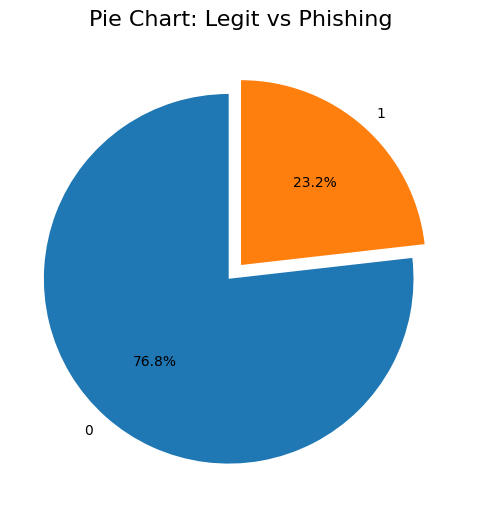

In [ ]:
# Calculate counts for each category
count_data = data['type'].value_counts()

# Create a pie chart with custom colors
plt.figure(figsize=(8, 6))
count_data.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=90, explode=(0.1, 0))  # Blue and Orange colors
plt.title('Pie Chart: Legit vs Phishing', fontsize=16)
plt.ylabel('')  # Hide the y-axis label to make it cleaner
plt.show()


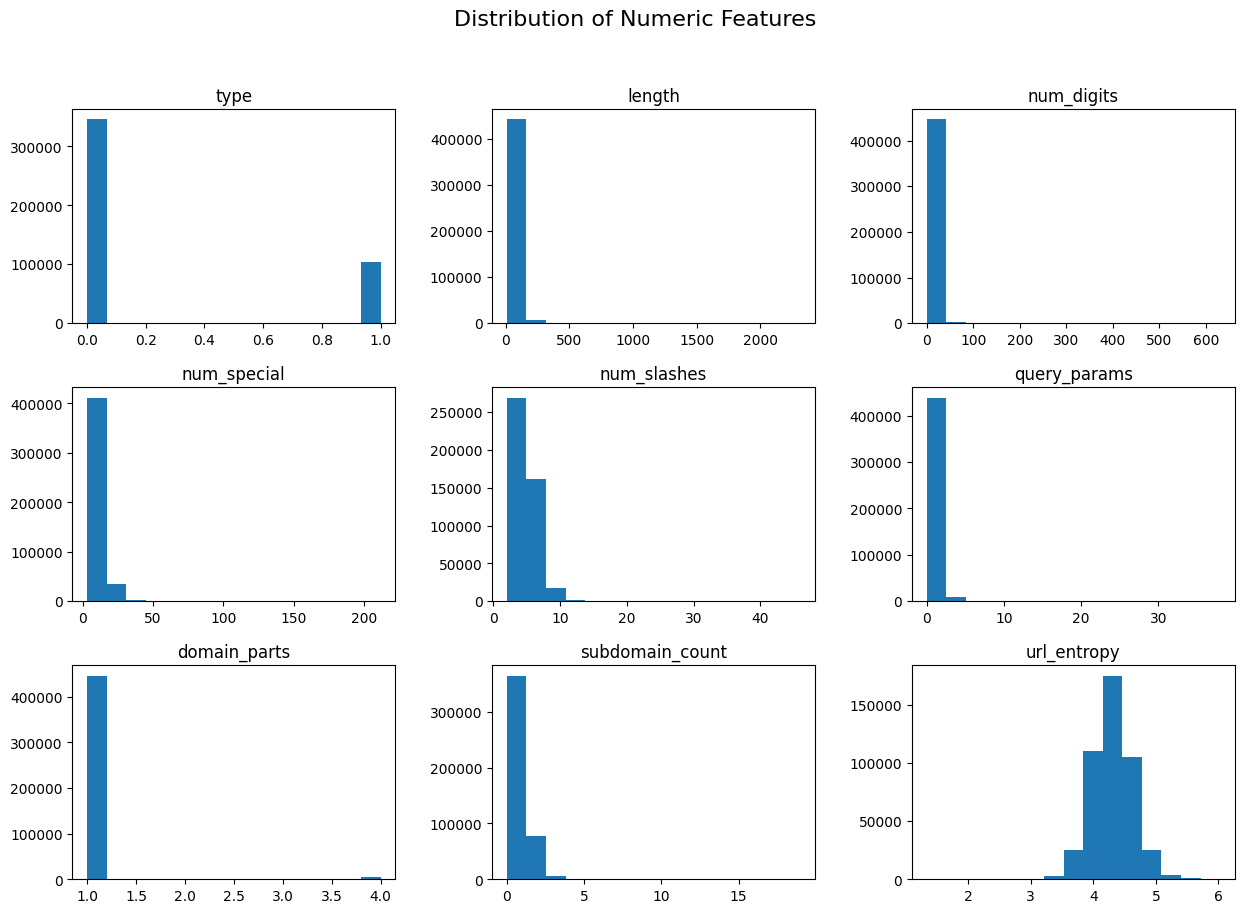

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Now plot histograms
numeric_data.hist(bins=15, figsize=(15, 10), grid=False)
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()


<ipython-input-12-19bd9a4558e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='husl')


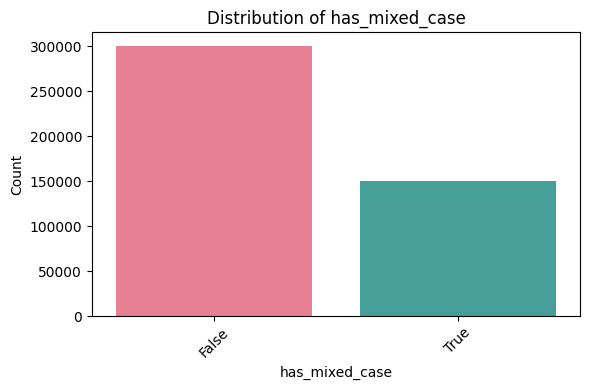

<ipython-input-12-19bd9a4558e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='husl')


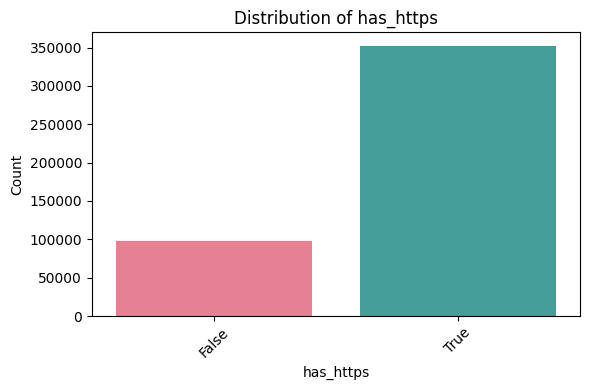

<ipython-input-12-19bd9a4558e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='husl')


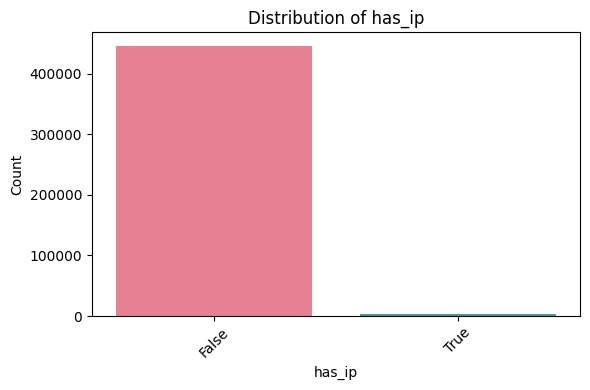

<ipython-input-12-19bd9a4558e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='husl')


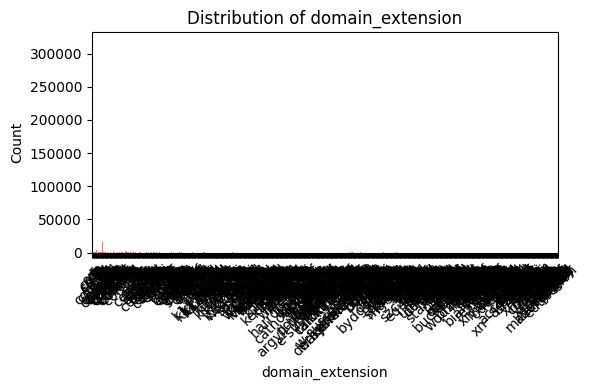

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select non-numeric columns: object and bool
non_numerical_cols = data.select_dtypes(include=['object', 'bool']).columns

# Plot distribution of each non-numeric feature with vibrant colors
for col in non_numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, palette='husl')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-13-fe5497f31c8e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_exts.index, y=top_exts.values, palette='tab10')


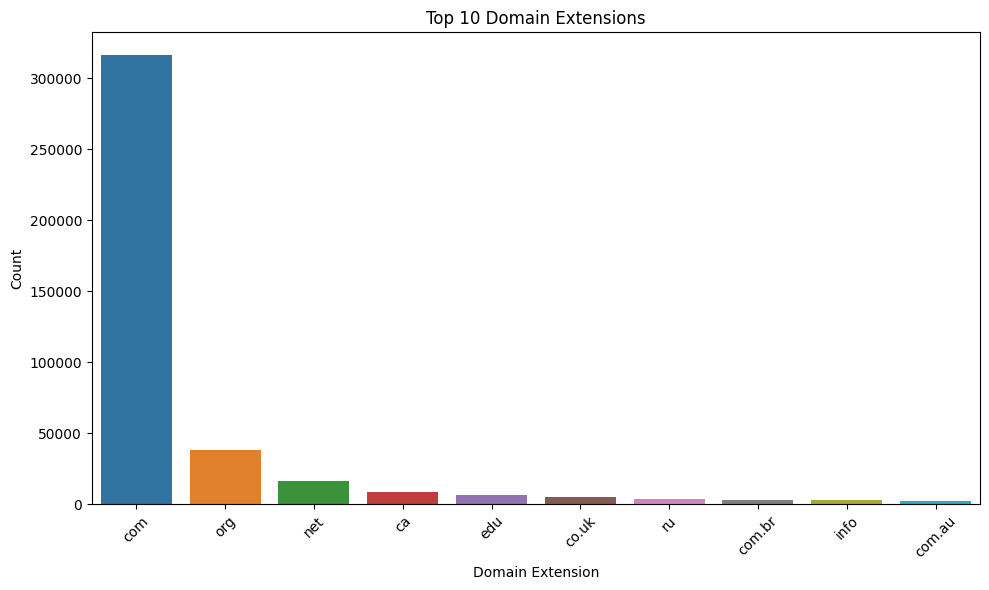

In [ ]:
# Count all domain extensions, ignoring NaNs temporarily during the plotting
ext_counts = data['domain_extension'].dropna().value_counts()

# Keep top 10 extensions
top_exts = ext_counts[:10]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_exts.index, y=top_exts.values, palette='tab10')

plt.title('Top 10 Domain Extensions')
plt.xlabel('Domain Extension')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Data Cleaning and Preprocessing


In [ ]:
# Check for duplicates data
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 89851


In [ ]:
# Find duplicate rows
duplicate_rows = data[data.duplicated()]
print(f"Number of found duplicate rows: {duplicate_rows.shape[0]}")

Number of found duplicate rows: 89851


<ipython-input-16-c64aba906b8e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=duplicate_rows, x='type', palette=['green', 'red'])


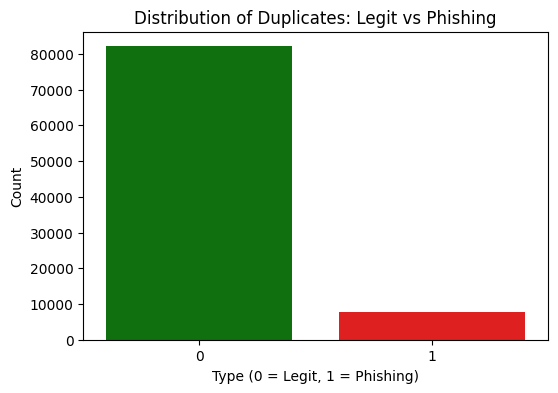

In [ ]:
# Check how duplicates are distributed between 'legit' (0) and 'phishing' (1)
plt.figure(figsize=(6, 4))
sns.countplot(data=duplicate_rows, x='type', palette=['green', 'red'])
plt.title('Distribution of Duplicates: Legit vs Phishing')
plt.xlabel('Type (0 = Legit, 1 = Phishing)')
plt.ylabel('Count')
plt.show()


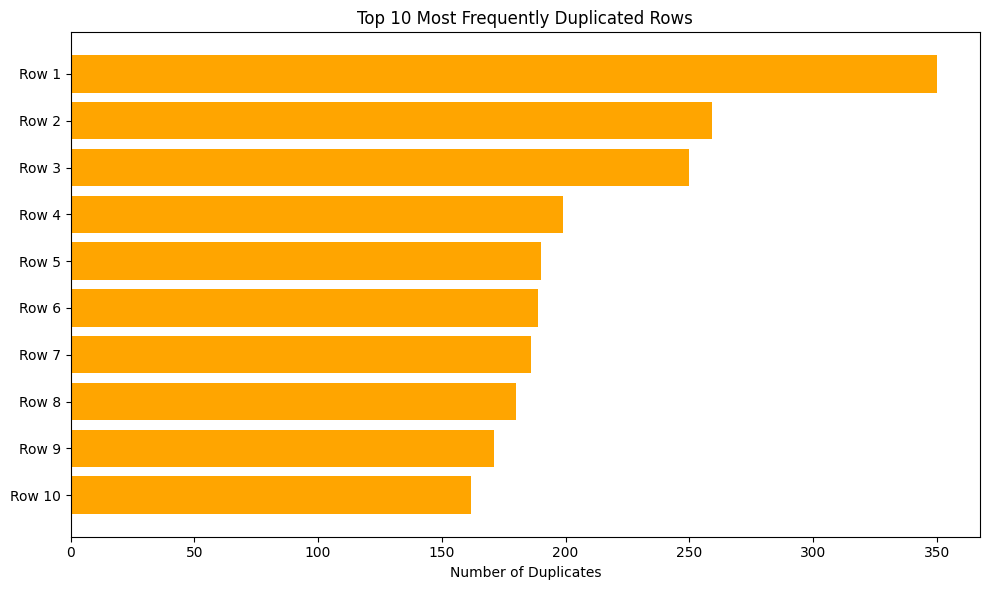

In [ ]:
# Get duplicated rows with their frequency
duplicate_counts = data[data.duplicated(keep=False)]
duplicate_summary = duplicate_counts.value_counts().reset_index()
duplicate_summary.columns = list(data.columns) + ['count']

# Sort by frequency
top_duplicates = duplicate_summary.sort_values(by='count', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_duplicates)), top_duplicates['count'], color='orange')
plt.yticks(range(len(top_duplicates)), [f"Row {i+1}" for i in range(len(top_duplicates))])
plt.xlabel("Number of Duplicates")
plt.title("Top 10 Most Frequently Duplicated Rows")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()

In [ ]:
# Check for duplicates data
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 type                   0
length                 0
num_digits             0
num_special            0
has_mixed_case         0
num_slashes            0
has_https              0
query_params           0
domain_parts           0
has_ip                 0
domain_extension    3244
subdomain_count        0
url_entropy            0
dtype: int64


In [ ]:
# Check unique values in 'domain_extension' before filling missing values
print(f"Unique values in 'domain_extension' before filling missing values: {data['domain_extension'].nunique()}")


Unique values in 'domain_extension' before filling missing values: 831


<Axes: >

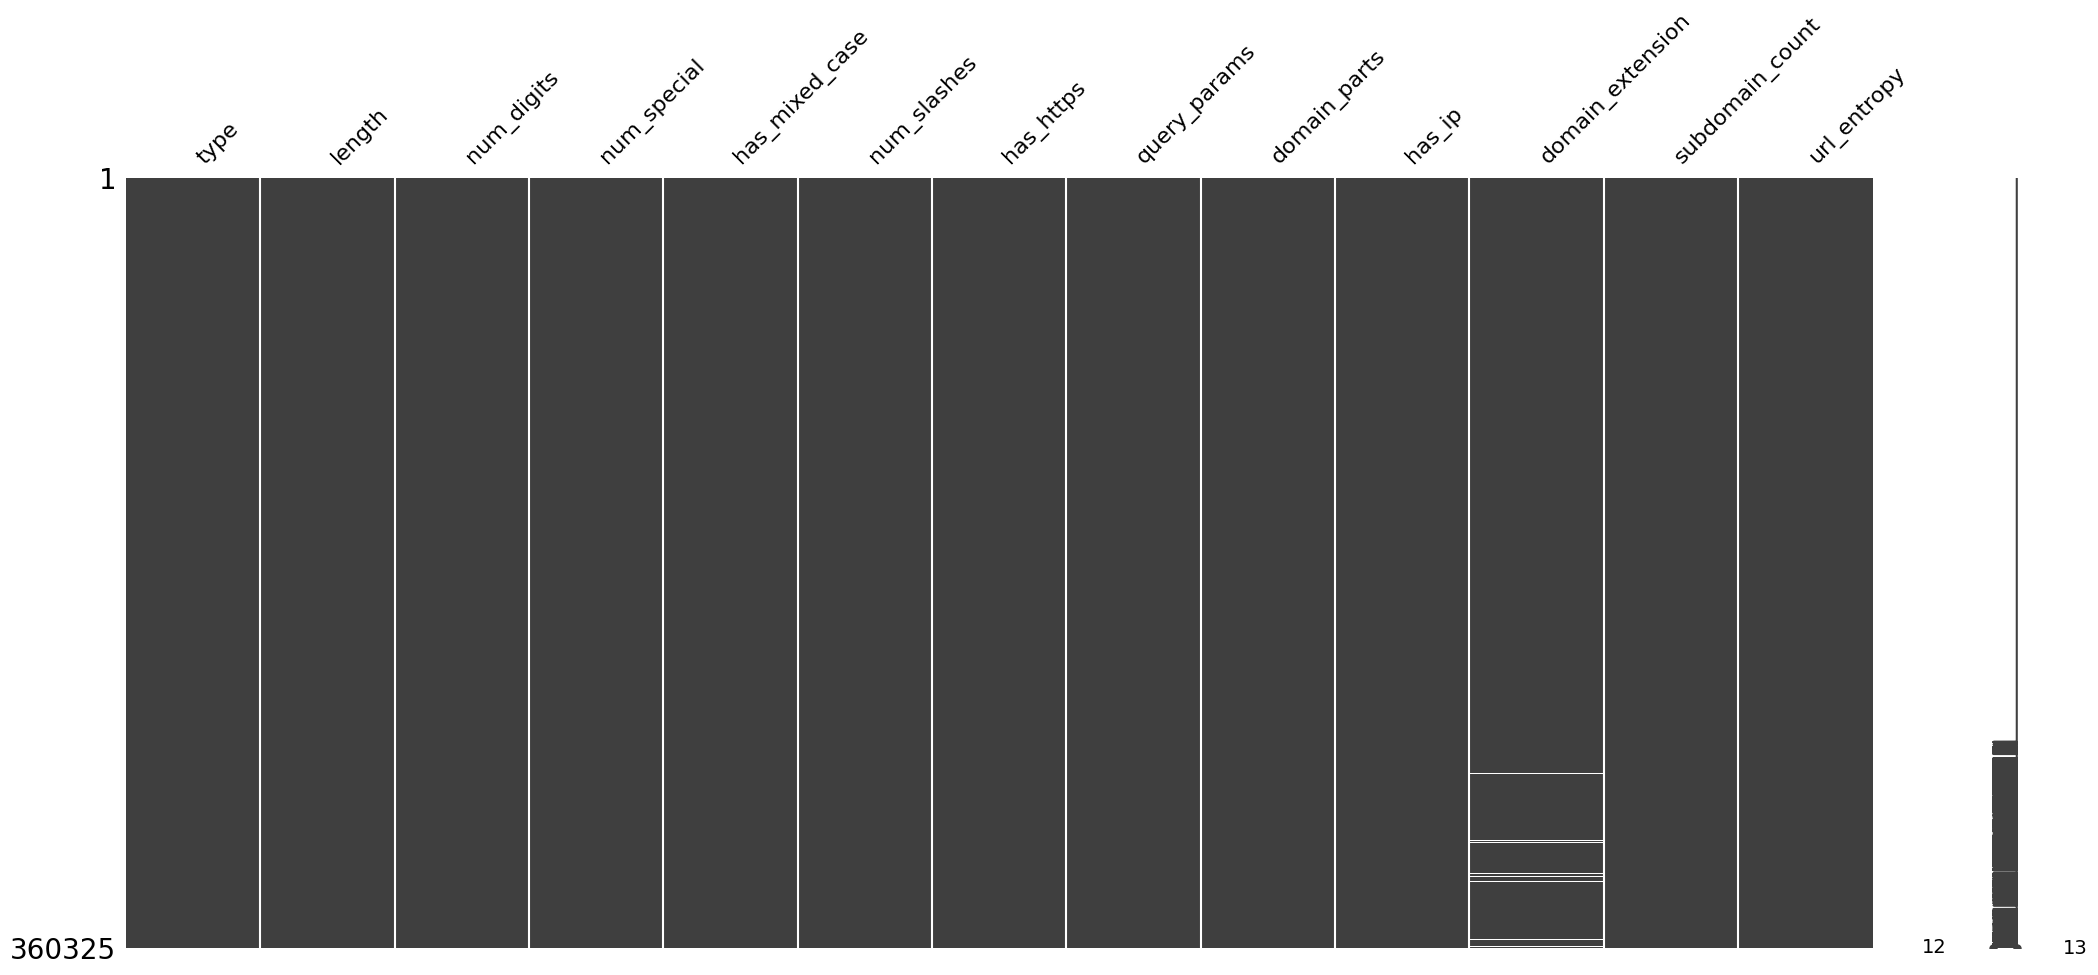

In [ ]:
msno.matrix(data)


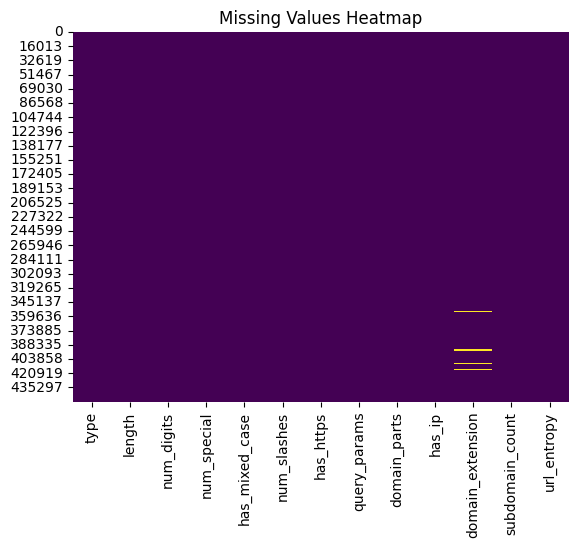

In [ ]:
# Boolean mask of missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Handle missing values in 'domain_extension'
# Replace NaN with 'missing' to treat missing values as a distinct category
# This allows the Decision Tree to learn if missing domain extensions are predictive of the target
data['domain_extension'] = data['domain_extension'].fillna('missing')

In [ ]:
label_encoder = LabelEncoder()
data['domain_extension'] = label_encoder.fit_transform(data['domain_extension'])
print(f"Unique values in 'domain_extension' after label encoding: {data['domain_extension'].nunique()}")


Unique values in 'domain_extension' after label encoding: 832


In [ ]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 type                0
length              0
num_digits          0
num_special         0
has_mixed_case      0
num_slashes         0
has_https           0
query_params        0
domain_parts        0
has_ip              0
domain_extension    0
subdomain_count     0
url_entropy         0
dtype: int64


In [ ]:
# Change 'type' column to categorical data type (if it's for classification)
data['type'] = data['type'].astype('category')  # Convert 'type' to a categorical variable


In [ ]:
#Convert boolean columns to 0/1
data['has_mixed_case'] = data['has_mixed_case'].astype(int)
data['has_https'] = data['has_https'].astype(int)
data['has_ip'] = data['has_ip'].astype(int)

## 3. Data Splitting.


In [ ]:
# Separate features (X) and target (y)
X = data.drop('type', axis=1)
y = data['type']

In [ ]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print("Training target distribution:")
print(y_train.value_counts())

print("Testing target distribution:")
print(y_test.value_counts())

Training target distribution:
type
0    210906
1     77354
Name: count, dtype: int64
Testing target distribution:
type
0    52726
1    19339
Name: count, dtype: int64


In [ ]:
import joblib
joblib.dump(X_train, 'X_train_rf.pkl')

['X_train_rf.pkl']

## 4. Create and train a Random Forest algorithm.


In [ ]:
# Initialize a baseline Random Forest model (with default parameters)
rf_baseline = RandomForestClassifier(random_state=42)

In [ ]:
# Train the baseline model
rf_baseline.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
rf_pred_baseline = rf_baseline.predict(X_test)

## 5.  Evaluate Random Forest model using multiple metrics

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, rf_pred_baseline))

# Precision
print("Precision:", precision_score(y_test,rf_pred_baseline, average='weighted'))

# Recall
print("Recall:", recall_score(y_test,rf_pred_baseline))

# F1 Score
print("F1 Score:", f1_score(y_test, rf_pred_baseline, average='weighted'))

Accuracy: 0.9905085686532991
Precision: 0.9905274351304185
Recall: 0.9715600599824189
F1 Score: 0.9904756192229436


In [ ]:
# Classification Report
print("Baseline Classification Report (Random Forest):\n", classification_report(y_test, rf_pred_baseline))

Baseline Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     52726
           1       0.99      0.97      0.98     19339

    accuracy                           0.99     72065
   macro avg       0.99      0.98      0.99     72065
weighted avg       0.99      0.99      0.99     72065



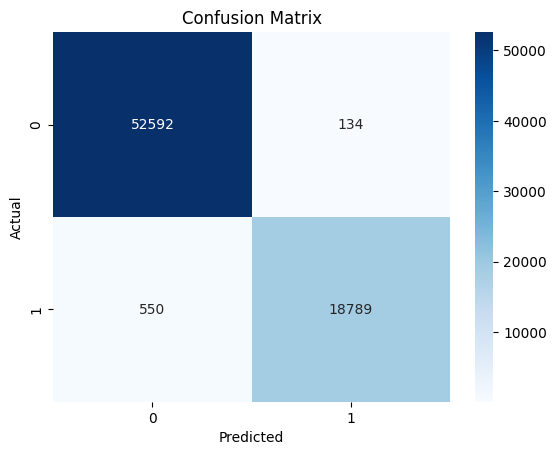

In [ ]:
cm = confusion_matrix(y_test,rf_pred_baseline)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC AUC Score: 0.9845093096634774


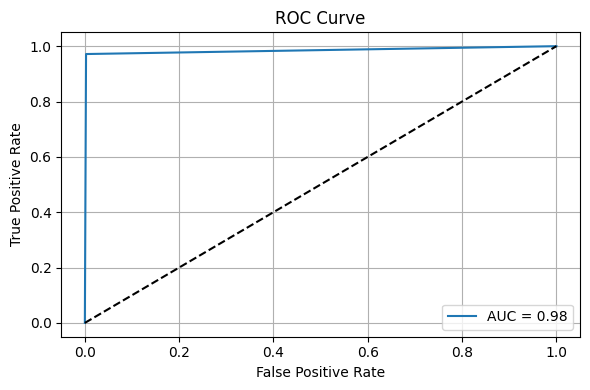

In [ ]:
# Predict probabilities for the positive class
y_prob =rf_baseline.predict_proba(X_test)[:, 1]

# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_baseline)

# Compute ROC AUC Score
auc = roc_auc_score(y_test, rf_pred_baseline)
print("ROC AUC Score:", auc)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Enhancement: Feature Selection.


In [ ]:
# Train the Random Forest model to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances and select the most important features
importances = rf_model.feature_importances_

# Select the most important features (e.g., top 20% based on importance)
# First, get the number of features to select based on the percentage
num_features = int(X_train.shape[1] * 0.2)  # Select top 20% features
model = SelectFromModel(rf_model, threshold="mean", max_features=num_features)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

# Train a new model using only the selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate the new model
rf_pred_selected = rf_model_selected.predict(X_test_selected)
print("Classification Report with Feature Selection (Random Forest):\n", classification_report(y_test, rf_pred_selected))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Classification Report with Feature Selection (Random Forest):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     52726
           1       1.00      0.96      0.98     19339

    accuracy                           0.99     72065
   macro avg       0.99      0.98      0.98     72065
weighted avg       0.99      0.99      0.99     72065



## 5. Enhancement: SMOTE.



In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import time

# Step 1: Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new training distribution after SMOTE
print("Training target distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Step 2: Train Random Forest on the resampled training set
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_train_time = time.time() - start_time
print(f"Random Forest training time (with SMOTE): {rf_train_time:.2f} seconds")

# Step 3: Evaluate on the test set
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report (with SMOTE):")
print(classification_report(y_test, y_pred))


Training target distribution after SMOTE:
type
0    210906
1    210906
Name: count, dtype: int64
Random Forest training time (with SMOTE): 56.77 seconds
Random Forest Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     52726
           1       0.99      0.97      0.98     19339

    accuracy                           0.99     72065
   macro avg       0.99      0.98      0.99     72065
weighted avg       0.99      0.99      0.99     72065



## 5. Enhancement: Adjust the Decision Threshold.



In [ ]:
# Get probabilities for Type 1
y_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of Type 1

# Adjust threshold (e.g., from 0.5 to 0.3)
threshold = 0.3
y_pred_adjusted = (y_proba >= threshold).astype(int)

print(f"Random Forest Classification Report (threshold={threshold}):")
print(classification_report(y_test, y_pred_adjusted))

Random Forest Classification Report (threshold=0.3):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     52726
           1       0.97      0.98      0.98     19339

    accuracy                           0.99     72065
   macro avg       0.98      0.98      0.98     72065
weighted avg       0.99      0.99      0.99     72065



In [ ]:
import joblib
joblib.dump( rf_model, 'randoms_model.pkl')

['randoms_model.pkl']